# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [1]:

import numpy as np
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
  words=email.split(' ')
  return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(processed):
  stem_words=[]
  ps=nltk.PorterStemmer()
  for x in processed:
    s=''
    for term in x.split():
      s=s+ps.stem(term)+' '
    stem_words.append(s)
  return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(email):
  stem_no_stop_words=[]
  ss=[]
  for i in email:
    processed=i.replace(r'[^\w\d\s]',' ')
    processed=processed.replace(r'\s+',' ')
    stem_no_stop_words.append(processed.replace(r'^\s+|\s+?$','').lower())
  stop_words=set(stopwords.words('english'))
  for x in stem_no_stop_words:
    s=''
    for term in x.split():
      if term not in stop_words:
        s=s+(term)+' '
    ss.append(s)
  return ss

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(final_processed):
  all_words=[]
  for message in final_processed:
    words=word_tokenize(message)
    for w in words:
      all_words.append(w)
  all_words=nltk.FreqDist(all_words)
  return list(all_words.keys())[:1500]

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(message,word_features):
  words=word_tokenize(message)
  features={}
  for word in word_features:
    features[word]=(word in words)
  return features

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
from csv import reader
def read_data(filename):
  file = open(filename,"r") # Open file in read mode
  lines = reader(file)
  data = list(lines)
  return data


  #messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['email'])
    
    



In [ ]:
# Path of dataset
import sys
import csv
 
csv.field_size_limit(sys.maxsize)
filename = "/content/spam_or_not_spam.csv"
data = read_data(filename)
email=[]
label=[]
for i in range(1,len(data)):
  if i==2967:
    continue 
  else:
    email.append(data[i][0])
    label.append(data[i][1])
def get_label():
  return label
nltk.download('stopwords')
processed=remove_stop_words(email)
final_processed=stemming(processed)
nltk.download('punkt')
word_features=build_vocabulary(final_processed)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
messages=list(zip(final_processed,label))
#defined seed for reproducability
seed=1
np.random.seed=seed 
np.random.shuffle(messages)
feature_sets=[(get_bow(t,word_features),l) for (t,l) in messages]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

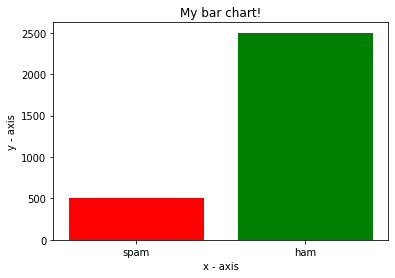

In [ ]:
import matplotlib.pyplot as plt

# visuallze data distribution


def data_vis(label):
  left = [1, 2]
 
  # heights of bars
  
  height = [label.count('1'),label.count('0')]
  
  # labels for bars
  tick_label = ['spam','ham']
  
  # plotting a bar chart
  plt.bar(left, height, tick_label = tick_label,
          width = 0.8, color = ['red', 'green'])
  
  # naming the x-axis
  plt.xlabel('x - axis')
  # naming the y-axis
  plt.ylabel('y - axis')
  # plot title
  plt.title('My bar chart!')
  
  # function to show the plot
  plt.show()
label=get_label()
data_vis(label)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import model_selection 

from sklearn.metrics import classification_report
# split dataset
def split(data):
  train_data,test_data=model_selection.train_test_split(feature_sets,test_size=0.25,random_state=seed)
  return train_data, test_data


# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data,test_data):
  nltk_model=SklearnClassifier(SVC())
  nltk_model.train(train_data)
  tf,labe=zip(*test_data)
  prediction=nltk_model.classify_many(tf)
  return classification_report(labe,prediction)

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data,test_data):
  nltk_model=SklearnClassifier(KNeighborsClassifier())
  nltk_model.train(train_data)
  tf,labe=zip(*test_data)
  prediction=nltk_model.classify_many(tf)
  return classification_report(labe,prediction)

train_data, test_data = split(data)
print(len(train_data))
print(len(test_data))

print(svm_classifier(train_data, test_data))
print(knn_classifier(train_data, test_data))


2249
750
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       638
           1       1.00      0.84      0.91       112

    accuracy                           0.98       750
   macro avg       0.99      0.92      0.95       750
weighted avg       0.98      0.98      0.98       750

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       638
           1       0.48      0.79      0.59       112

    accuracy                           0.84       750
   macro avg       0.72      0.82      0.75       750
weighted avg       0.89      0.84      0.85       750



### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [ ]:

from sklearn.metrics import accuracy_score

from nltk.classify.scikitlearn import SklearnClassifier
# compute accuracy 
def compute_accuracy(train_data,test_data):
  
  nltk_model=SklearnClassifier(KNeighborsClassifier())
  nltk_model.train(train_data)
  sltk_model=SklearnClassifier(SVC())
  sltk_model.train(train_data)
  accuracy=nltk.classify.accuracy(nltk_model,test_data)*100
  accuracy1=nltk.classify.accuracy(sltk_model,test_data)*100
  return accuracy1,accuracy

# compute AUC score 
def compute_auc(train_data,test_data):

  nltk_model=SklearnClassifier(KNeighborsClassifier())
  nltk_model.train(train_data)
  tf,labe=zip(*test_data)
  prediction=nltk_model.classify_many(tf)
  sltk_model=SklearnClassifier(SVC())
  sltk_model.train(train_data)
  tf1,labe1=zip(*test_data)
  prediction1=sltk_model.classify_many(tf1)
  return accuracy_score(labe1,prediction1),accuracy_score(labe,prediction)
  
  
print(compute_accuracy(train_data,test_data))
print(compute_auc(train_data,test_data))
# write code to print train and test accuracy and AUC score of SVM and k-NN classifier

(97.6, 84.0)
(0.976, 0.84)
